In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
haberman = pd.read_csv("haberman.csv")

In [4]:
haberman.columns = ['age', 'op_year', 'axil_nodes', 'surv_status']

In [5]:
haberman.columns

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')

In [6]:
haberman['surv_status'].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

Observation:
1. This is imbalanced dataset

In [7]:
haberman.shape

#mapping category 1 and 2 to yes or no
# haberman['surv_status'] = haberman['surv_status'].map({1:'yes', 2:'no'})

(305, 4)

In [9]:
haberman.describe()

,age,op_year,axil_nodes,surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


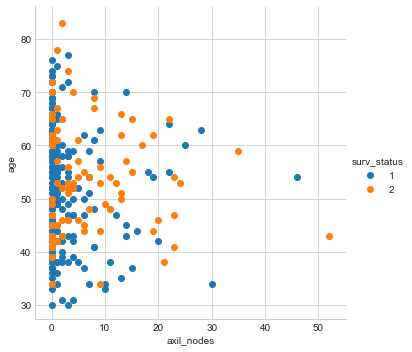

In [18]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend();
plt.show();

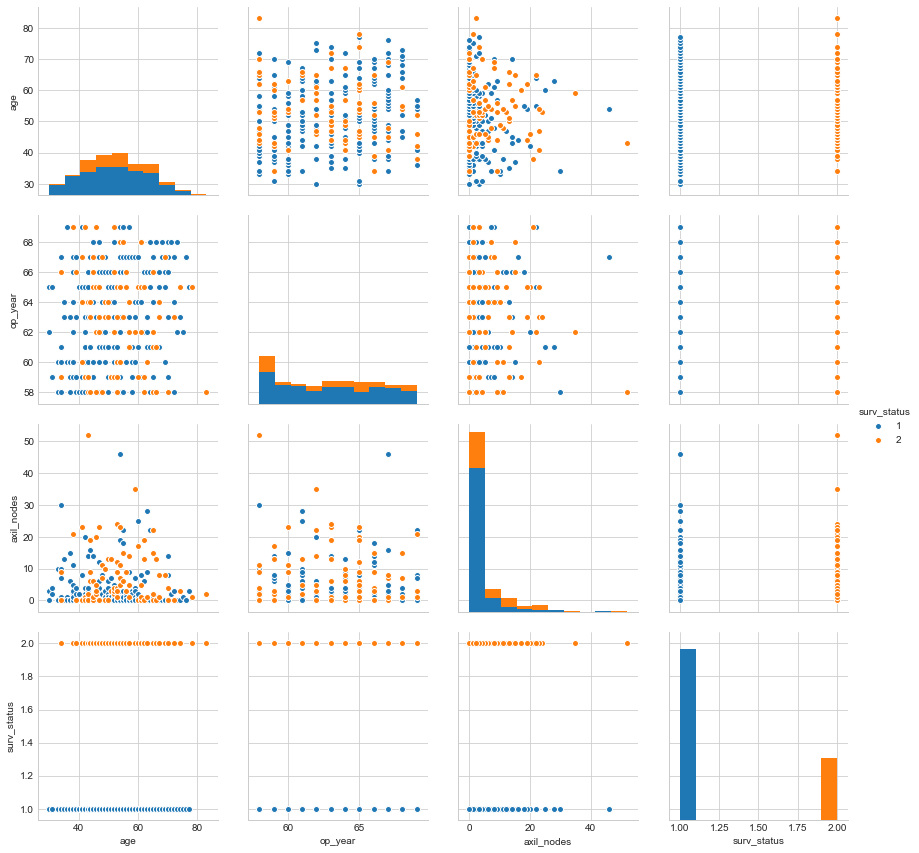

In [23]:
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="surv_status", size=3);
plt.show()

Observation:
1. Age and axillary nodes are the most dominant features

In [25]:
haberman_success = haberman.loc[haberman['surv_status'] == 1]
haberman_fail = haberman.loc[haberman['surv_status'] == 2]

C:\Users\kaush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kaush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


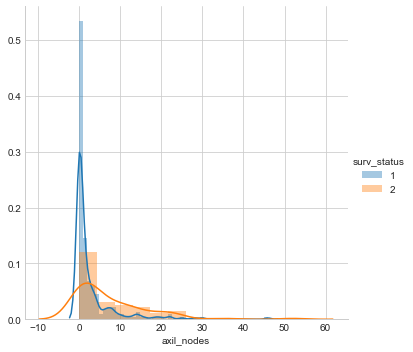

In [28]:
sns.FacetGrid(haberman, hue='surv_status', size = 5)\
   .map(sns.distplot, 'axil_nodes')\
   .add_legend()
plt.show()

C:\Users\kaush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kaush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


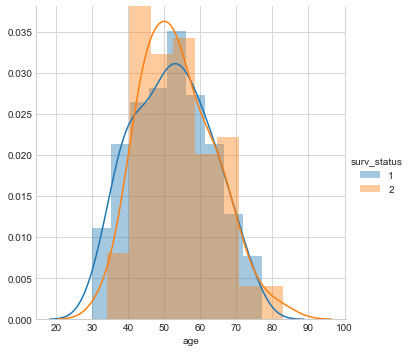

In [30]:
sns.FacetGrid(haberman, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


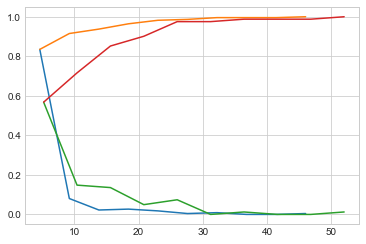

In [37]:
#success
counts, bin_edges = np.histogram(haberman_success['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#fail
counts, bin_edges = np.histogram(haberman_fail['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


Observation:
1. Patients having axillary nodes between (~) 0 - 6 are in category 1
2. Patients having axillary nodes more than (~) 6 are in category 2

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


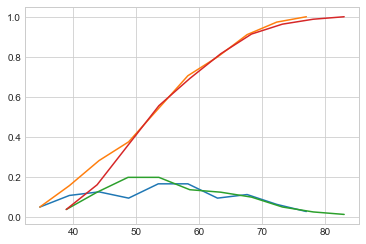

In [41]:
#success
counts, bin_edges = np.histogram(haberman_success['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#fail
counts, bin_edges = np.histogram(haberman_fail['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


Observation:
1. Patients having age (~) 33-44 are more likely to fall in category 1
1. Patients having age (~) 44-55 are more likely to fall in category 2
1. Patients having age (~) more than 55 are ambiguous

In [51]:
#success
print("------Success-------")

print("mean axilnodes: ")
print(np.mean(haberman_success['axil_nodes']))
print("median axilnodes: ")
print(np.median(haberman_success['axil_nodes']))
print('std axilnodes: ')
print(np.std(haberman_success['axil_nodes']))

print("\n")
print("mean age: ")
print(np.mean(haberman_success['age']))
print("std age: ")
print(np.std(haberman_success['age']))

------Success-------
mean axilnodes: 
2.799107142857143
median axilnodes: 
0.0
std axilnodes: 
5.869092706952767


mean age: 
52.11607142857143
std age: 
10.913004640364269


In [52]:
#Fail
print("------Fail-------")

print("mean axilnodes: ")
print(np.mean(haberman_fail['axil_nodes']))
print("median axilnodes: ")
print(np.median(haberman_fail['axil_nodes']))
print('std axilnodes: ')
print(np.std(haberman_fail['axil_nodes']))

print("\n")
print("mean age: ")
print(np.mean(haberman_fail['age']))
print("std age: ")
print(np.std(haberman_fail['age']))

------Fail-------
mean axilnodes: 
7.45679012345679
median axilnodes: 
4.0
std axilnodes: 
9.128776076761632


mean age: 
53.67901234567901
std age: 
10.10418219303131


Observation:
1. Survival status is independent of age

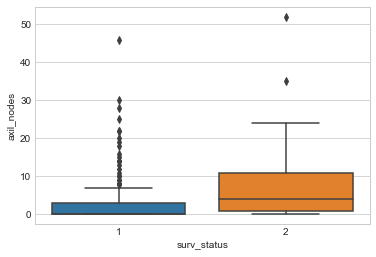

In [67]:
sns.boxplot(x = 'surv_status', y = 'axil_nodes', data=haberman)

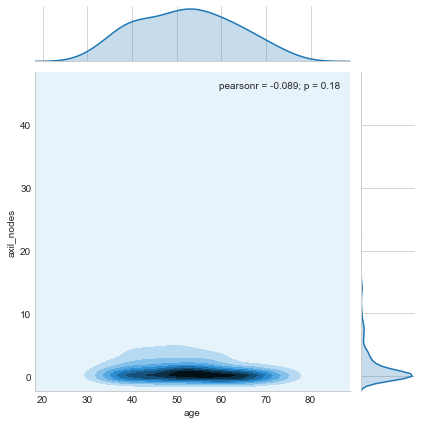

In [72]:
sns.jointplot(x="age", y="axil_nodes", data=haberman_success, kind="kde");
plt.show();

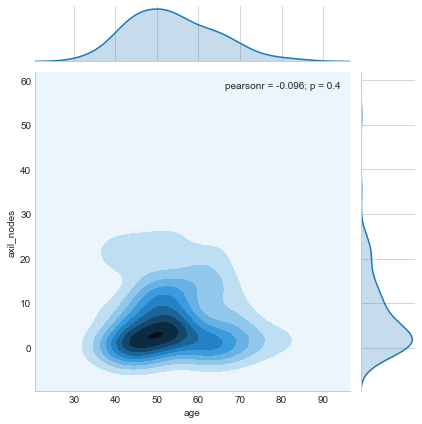

In [73]:
sns.jointplot(x="age", y="axil_nodes", data=haberman_fail, kind="kde");
plt.show();

# Final Observation:
    1. Age and year of operation has no significant effect on survival status
    2. The objective of classifying the survival status of a new patient based on the given features is a difficult task as the data is imbalanced.
    3. Number of positive axillary nodes and survival status are inversely proportional to each other
    4. Zero positive auxillary nodes does not guarentee survival